[[1.0000e+00 0.0000e+00 0.0000e+00 2.0000e+00]
 [4.0000e+00 3.0000e+00 0.0000e+00 2.0000e+00]
 [7.0000e+00 6.0000e+00 0.0000e+00 2.0000e+00]
 ...
 [7.1994e+04 7.1992e+04 0.0000e+00 1.8000e+04]
 [7.1995e+04 7.1993e+04 0.0000e+00 1.8000e+04]
 [7.1997e+04 7.1996e+04 0.0000e+00 3.6000e+04]]


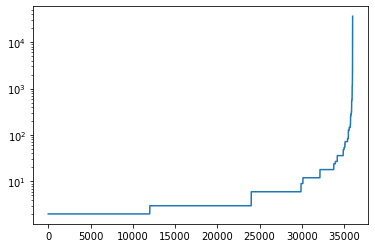

In [6]:
import matplotlib.pyplot as plt
from shap.maskers import Image as ImageMasker
import numpy as np

class TensorImageMasker(ImageMasker):
    def __init__(self, mask, shape=None):
        super().__init__(mask, shape)
    
    def __call__(self, mask, x):
        x = x.cpu().numpy()
        # print("masker", x.shape)
        masked_x = super().__call__(mask, x)
        return masked_x

shape = (100, 120, 3)
M = np.prod(shape)
masker = TensorImageMasker("inpaint_telea", shape)   
plt.plot(masker.clustering[:, 3])
plt.yscale("log")
print(masker.clustering)

In [8]:
out_shape = (2*masker.clustering.shape[0]+1,)
dvalues = np.zeros(out_shape)
ind = len(dvalues)-1
print(ind, M)
# get the left and right children of this cluster
lind = int(masker.clustering[ind-M, 0]) if ind >= M else -1
rind = int(masker.clustering[ind-M, 1]) if ind >= M else -1
print(lind, rind)

71998 36000
71997 71996


In [3]:
100 // 2 - 2

48